In [50]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [51]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [53]:
total_value = df.count()['Total Score']

In [54]:
df1 = df[(df["math score"]>=80) & (df["reading score"]>=80) & (df["writing score"]>=80)]
df1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
2,female,group B,master's degree,standard,none,90,95,93,278
6,female,group B,some college,standard,completed,88,95,92,275


In [55]:
df1.to_csv('HSG.csv', index=False)

###  Từ D1 cho biết: Nam hay Nữ đạt điểm giỏi ở 3 phần thi cao hơn?

In [77]:
df1.groupby('gender').count()['Total Score']

gender
female    72
male      49
Name: Total Score, dtype: int64

###  Thống kê số lượng học sinh đạt điểm giỏi ở mỗi chủng tộc theo D1

In [78]:
df1.groupby('race/ethnicity').count()['Total Score']

race/ethnicity
group A     7
group B    17
group C    36
group D    30
group E    31
Name: Total Score, dtype: int64

### Từ df hãy cho biết có bao nhiêu học sinh đạt yêu cầu bài thi

In [58]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [59]:
df[df['Total Score'] >=200].count()['Total Score']

556

### Từ df hãy cho biết % số học sinh chỉ đạt điểm giỏi ở đúng một phần thi

- Số học sinh chỉ đạt điểm giỏi môn Toán:

In [89]:
good_math = df[(df["math score"]>=80) & (df["reading score"]<80) & (df["writing score"]<80)].count()['math score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi môn Toán:

In [90]:
percent_good_math = (good_math/total_value)*100
print(percent_good_math)

4.3999999999999995


- Số học sinh chỉ đạt điểm giỏi Reading

In [91]:
good_reading = df[(df["math score"]<80) & (df["reading score"]>=80) & (df["writing score"]<80)].count()['math score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi Reading

In [92]:
percent_good_reading = (good_reading/total_value)*100
print(percent_good_reading)

2.6


- Số học sinh chỉ đạt điểm giỏi Writing

In [93]:
good_writing = df[(df["math score"]<80) & (df["reading score"]<80) & (df["writing score"]>=80)].count()['math score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi Wrinting

In [94]:
percent_good_writing = (good_writing/total_value)*100
print(percent_good_writing)

2.8000000000000003


### Từ df hãy chỉ ra trường/cột nào có ảnh hưởng lớn nhất đến việc học sinh đạt yêu cầu bài thi

In [66]:
df2 = df[df['Total Score'] >=200]
df3 = df[df['Total Score'] <200]
df2.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


In [67]:
gender = set(df['gender'])
value_gender = df2.groupby('gender').count()['Total Score']

gender2 = set(df['gender'])
value_gender2 = df3.groupby('gender').count()['Total Score']

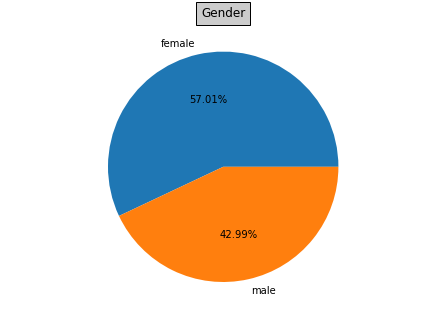

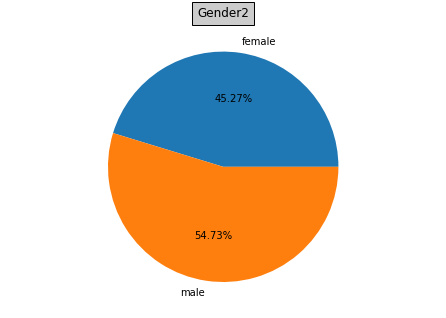

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_gender, labels = gender,autopct='%1.2f%%')
plt.title("Gender", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_gender2, labels = gender2,autopct='%1.2f%%')
plt.title("Gender2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [69]:
race = set(df['race/ethnicity'])
value_race = df2.groupby('race/ethnicity').count()['Total Score']

race2 = set(df['race/ethnicity'])
value_race2 = df3.groupby('race/ethnicity').count()['Total Score']

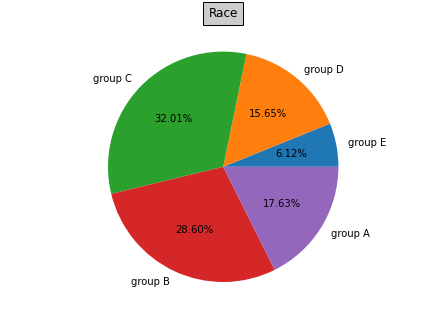

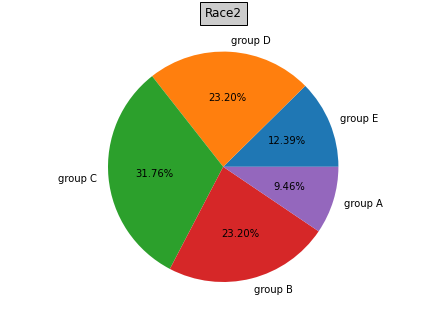

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_race, labels = race,autopct='%1.2f%%')
plt.title("Race", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_race2, labels = race2,autopct='%1.2f%%')
plt.title("Race2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [71]:
parental_level_of_education = set(df['parental level of education'])
value_parental_level_of_education = df2.groupby('parental level of education').count()['Total Score']

parental_level_of_education2 = set(df['parental level of education'])
value_parental_level_of_education2 = df3.groupby('parental level of education').count()['Total Score']

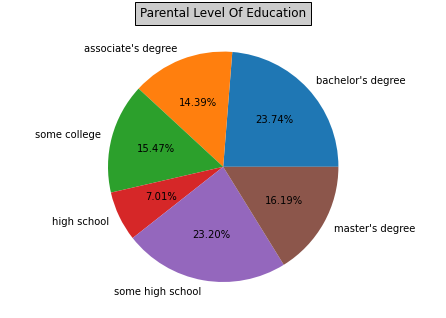

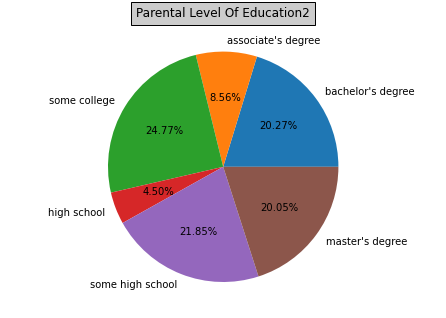

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_parental_level_of_education, labels = parental_level_of_education,autopct='%1.2f%%')
plt.title("Parental Level Of Education", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_parental_level_of_education2, labels = parental_level_of_education2,autopct='%1.2f%%')
plt.title("Parental Level Of Education2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [73]:
lunch = set(df['lunch'])
value_lunch = df2.groupby('lunch').count()['Total Score']

lunch2 = set(df['lunch'])
value_lunch2 = df3.groupby('lunch').count()['Total Score']

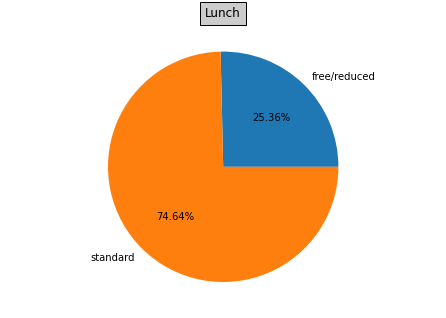

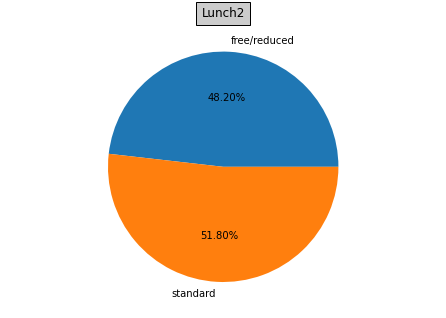

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_lunch, labels = lunch,autopct='%1.2f%%')
plt.title("Lunch", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_lunch2, labels = lunch2,autopct='%1.2f%%')
plt.title("Lunch2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [75]:
test_preparation_course = set(df['test preparation course'])
value_test_preparation_course = df2.groupby('test preparation course').count()['Total Score']

test_preparation_course2 = set(df['test preparation course'])
value_test_preparation_course2 = df3.groupby('test preparation course').count()['Total Score']

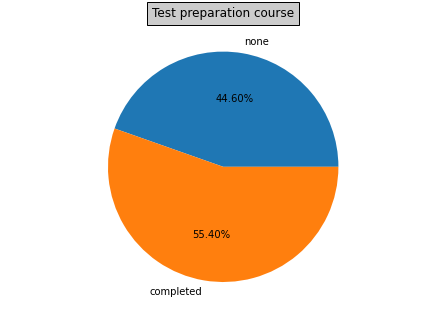

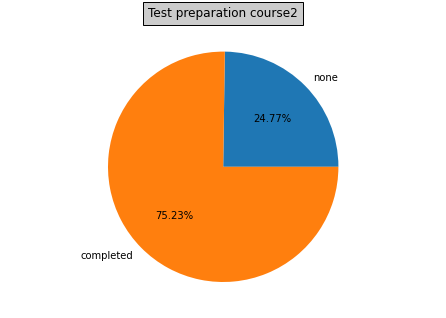

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_test_preparation_course, labels = test_preparation_course,autopct='%1.2f%%')
plt.title("Test preparation course", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_test_preparation_course2, labels = test_preparation_course2,autopct='%1.2f%%')
plt.title("Test preparation course2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Kết luận của em là Lunch